In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# graph-ufs predictions
ds_pred = xr.open_zarr("zarr-stores/graphufs_predictions.zarr/")
ds_pred.load()

<xarray.Dataset> Size: 19GB
Dimensions:     (optim_step: 6, time: 40, batch: 16, lat: 192, lon: 384,
                 level: 3, z_l: 3)
Coordinates:
  * batch       (batch) int64 128B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * lat         (lat) float64 2kB 89.28 88.36 87.42 ... -87.42 -88.36 -89.28
  * level       (level) float32 12B 97.82 505.7 998.8
  * lon         (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * optim_step  (optim_step) int64 48B 0 1 2 3 4 5
  * time        (time) timedelta64[ns] 320B 0 days 06:00:00 ... 10 days 00:00:00
  * z_l         (z_l) float64 24B 0.5154 47.36 200.3
Data variables:
    SSH         (optim_step, time, batch, lat, lon) float32 1GB -0.7963 ... -0.0
    icec        (optim_step, time, batch, lat, lon) float32 1GB 1.0 1.0 ... -0.0
    icetk       (optim_step, time, batch, lat, lon) float32 1GB 2.401 ... -0.0
    pressfc     (optim_step, time, batch, lat, lon) float32 1GB 1.029e+05 ......
    so          (optim_step, time, batch, z_l, lat, lon) float32 3GB 32.09 .....
    soilm       (optim_step, time, batch, lat, lon) float32 1GB -0.06334 ... ...
    temp        (optim_step, time, batch, z_l, lat, lon) float32 3GB -1.738 ....
    tmp         (optim_step, time, batch, level, lat, lon) float32 3GB 199.5 ...
    tmp2m       (optim_step, time, batch, lat, lon) float32 1GB 241.9 ... 153.3
    ugrd10m     (optim_step, time, batch, lat, lon) float32 1GB -0.463 ... -1...
    vgrd10m     (optim_step, time, batch, lat, lon) float32 1GB -5.891 ... -1...

In [3]:
# targets
ds_tar = xr.open_zarr("zarr-stores/graphufs_targets.zarr/")
ds_tar.load()

<xarray.Dataset> Size: 19GB
Dimensions:     (optim_step: 6, batch: 16, time: 40, lat: 192, lon: 384,
                 level: 3, z_l: 3)
Coordinates:
  * batch       (batch) int64 128B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * lat         (lat) float64 2kB 89.28 88.36 87.42 ... -87.42 -88.36 -89.28
  * level       (level) float32 12B 97.82 505.7 998.8
  * lon         (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * optim_step  (optim_step) int64 48B 0 1 2 3 4 5
  * time        (time) timedelta64[ns] 320B 0 days 06:00:00 ... 10 days 00:00:00
  * z_l         (z_l) float64 24B 0.5154 47.36 200.3
Data variables:
    SSH         (optim_step, batch, time, lat, lon) float32 1GB -0.8005 ... 0.0
    icec        (optim_step, batch, time, lat, lon) float32 1GB 0.9994 ... 0.0
    icetk       (optim_step, batch, time, lat, lon) float32 1GB 2.397 ... 0.0
    pressfc     (optim_step, batch, time, lat, lon) float32 1GB 1.03e+05 ... 0.0
    so          (optim_step, batch, time, z_l, lat, lon) float32 3GB 32.03 .....
    soilm       (optim_step, batch, time, lat, lon) float32 1GB 0.0 0.0 ... 0.0
    temp        (optim_step, batch, time, z_l, lat, lon) float32 3GB -1.744 ....
    tmp         (optim_step, batch, time, level, lat, lon) float32 3GB 199.7 ...
    tmp2m       (optim_step, batch, time, lat, lon) float32 1GB 241.8 ... 0.0
    ugrd10m     (optim_step, batch, time, lat, lon) float32 1GB 1.18 ... 0.0
    vgrd10m     (optim_step, batch, time, lat, lon) float32 1GB -5.789 ... 0.0
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

In [4]:
# inputs
ds_inp = xr.open_zarr("zarr-stores/graphufs_inputs.zarr/")
ds_inp.load()

<xarray.Dataset> Size: 1GB
Dimensions:            (optim_step: 6, batch: 16, time: 2, lat: 192, lon: 384,
                        z_l: 3, level: 3)
Coordinates:
  * batch              (batch) int64 128B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * lat                (lat) float64 2kB 89.28 88.36 87.42 ... -88.36 -89.28
  * level              (level) float32 12B 97.82 505.7 998.8
  * lon                (lon) float64 3kB 0.0 0.9375 1.875 ... 357.2 358.1 359.1
  * optim_step         (optim_step) int64 48B 0 1 2 3 4 5
  * time               (time) timedelta64[ns] 16B -1 days +18:00:00 00:00:00
  * z_l                (z_l) float64 24B 0.5154 47.36 200.3
Data variables: (12/16)
    SSH                (optim_step, batch, time, lat, lon) float32 57MB -0.78...
    day_progress_cos   (optim_step, batch, time, lon) float32 295kB -4.371e-0...
    day_progress_sin   (optim_step, batch, time, lon) float32 295kB 1.0 ... 0.0
    icec               (optim_step, batch, time, lat, lon) float32 57MB 0.999...
    icetk              (optim_step, batch, time, lat, lon) float32 57MB 2.416...
    landsea_mask       (optim_step, batch, z_l, lat, lon) float32 85MB 1.0 .....
    ...                 ...
    tmp                (optim_step, batch, time, level, lat, lon) float32 170MB ...
    tmp2m              (optim_step, batch, time, lat, lon) float32 57MB 242.1...
    ugrd10m            (optim_step, batch, time, lat, lon) float32 57MB -0.40...
    vgrd10m            (optim_step, batch, time, lat, lon) float32 57MB -5.29...
    year_progress_cos  (optim_step, batch, time) float32 768B 1.0 1.0 ... 0.0
    year_progress_sin  (optim_step, batch, time) float32 768B 0.003359 ... 0.0
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

### SSH

/tmp/ipykernel_545007/4164524984.py:2: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for bnum in range(ds_pred.dims['batch']):


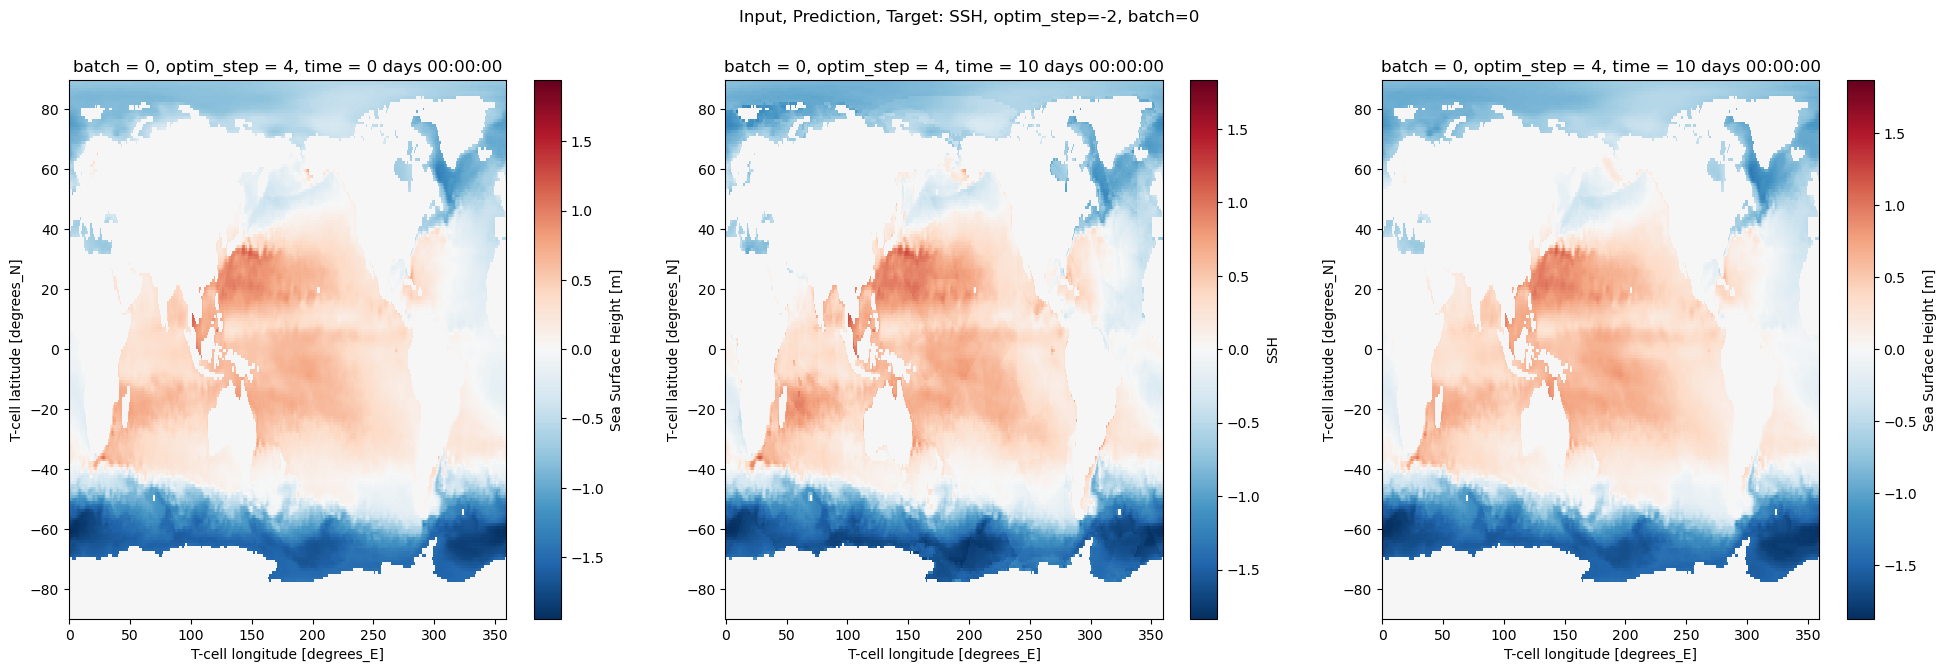

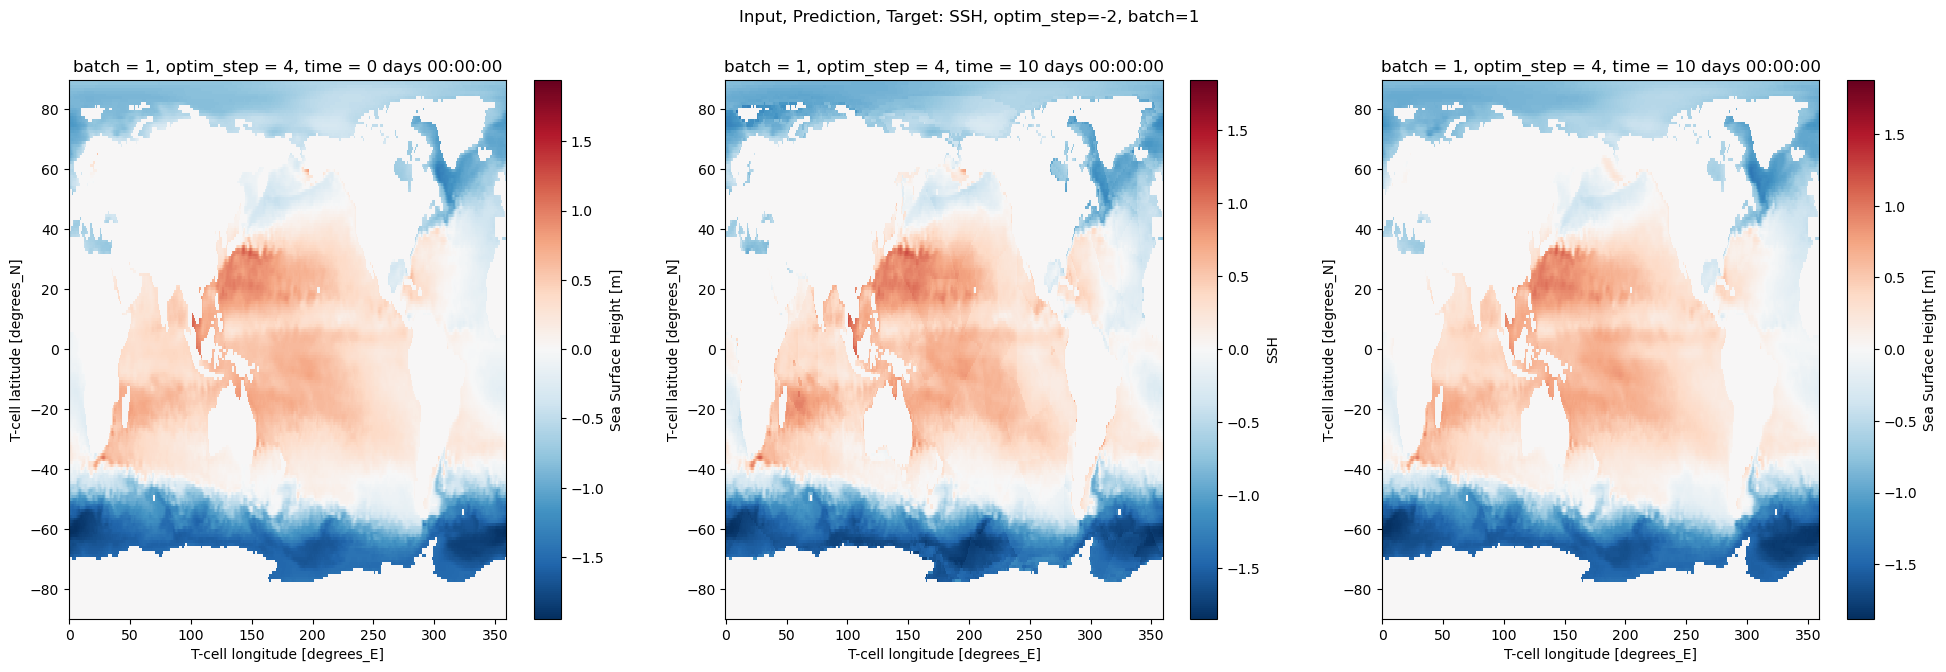

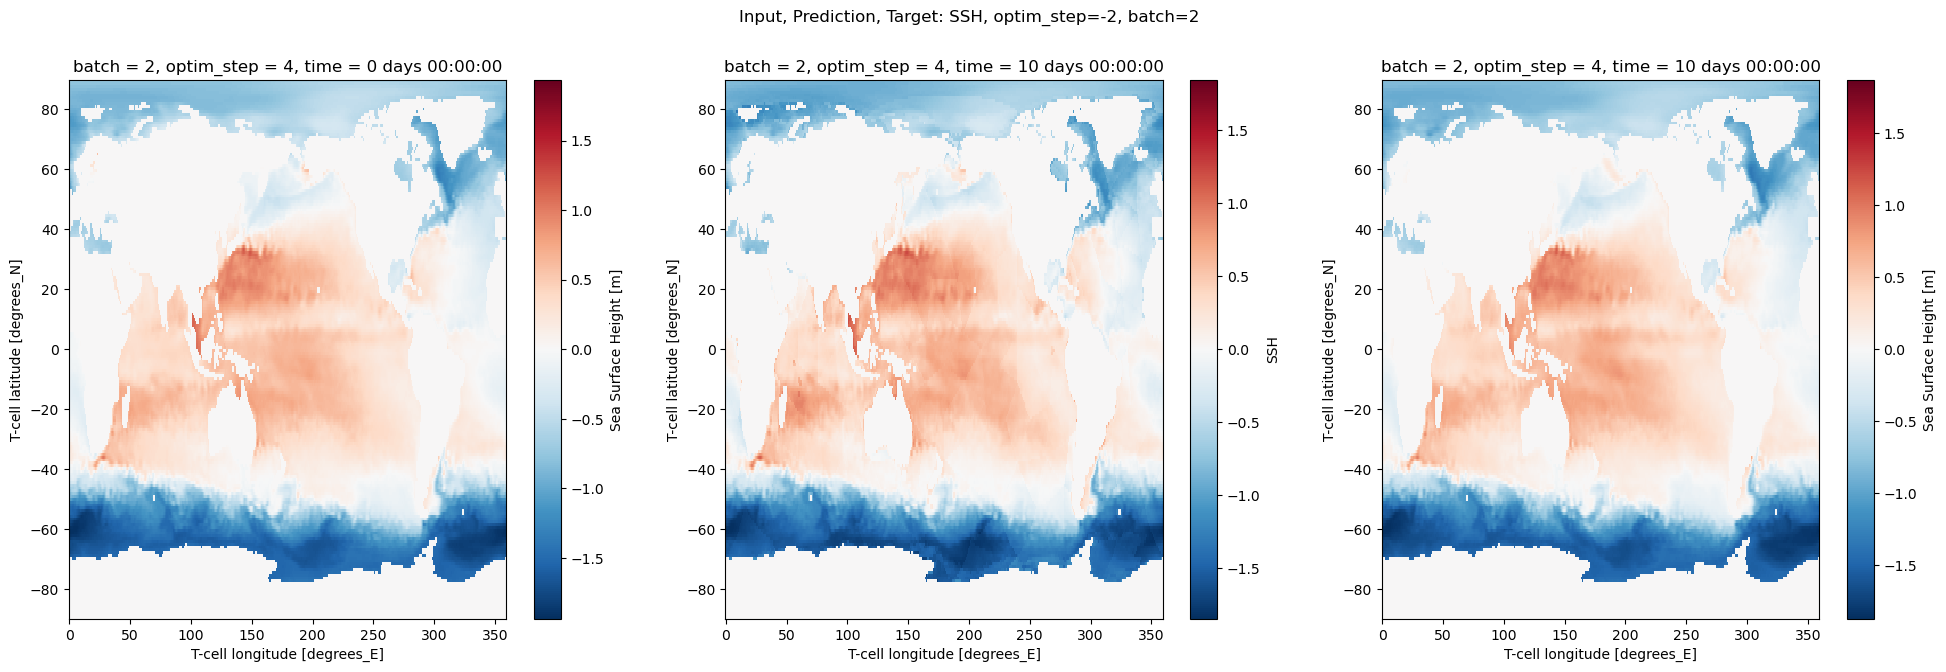

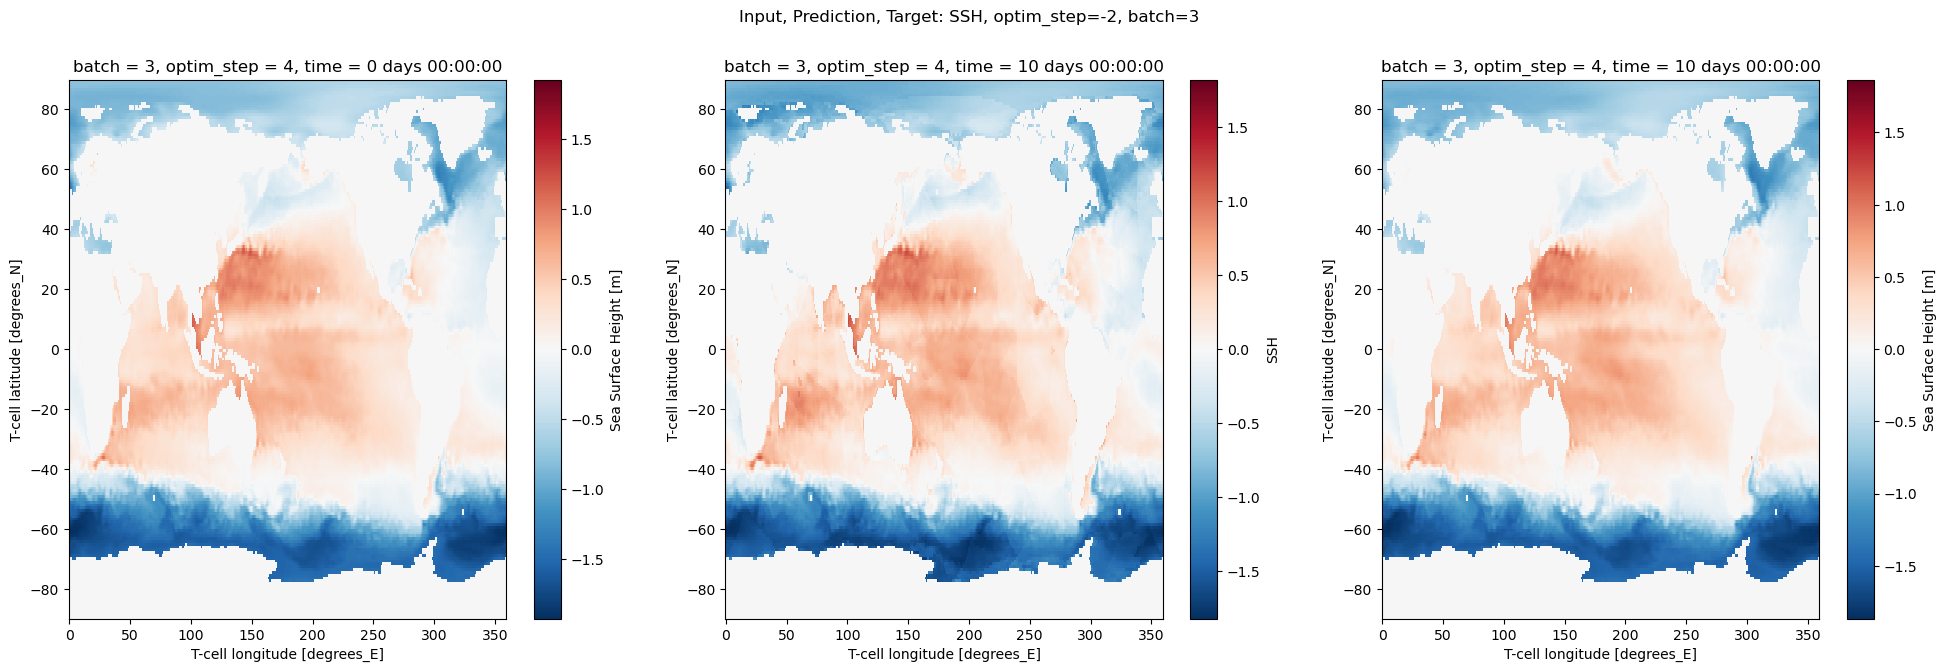

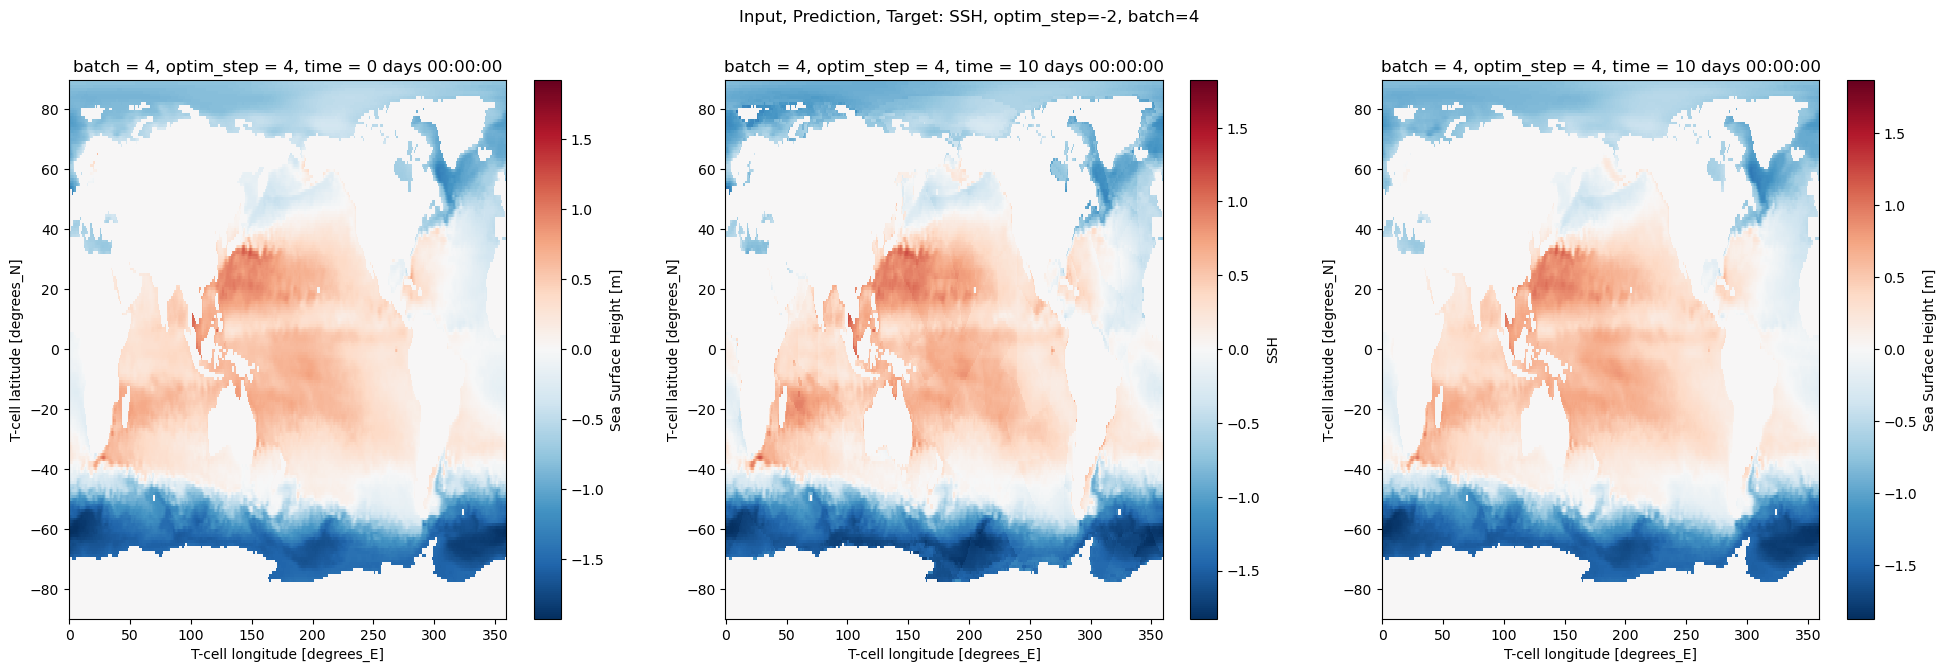

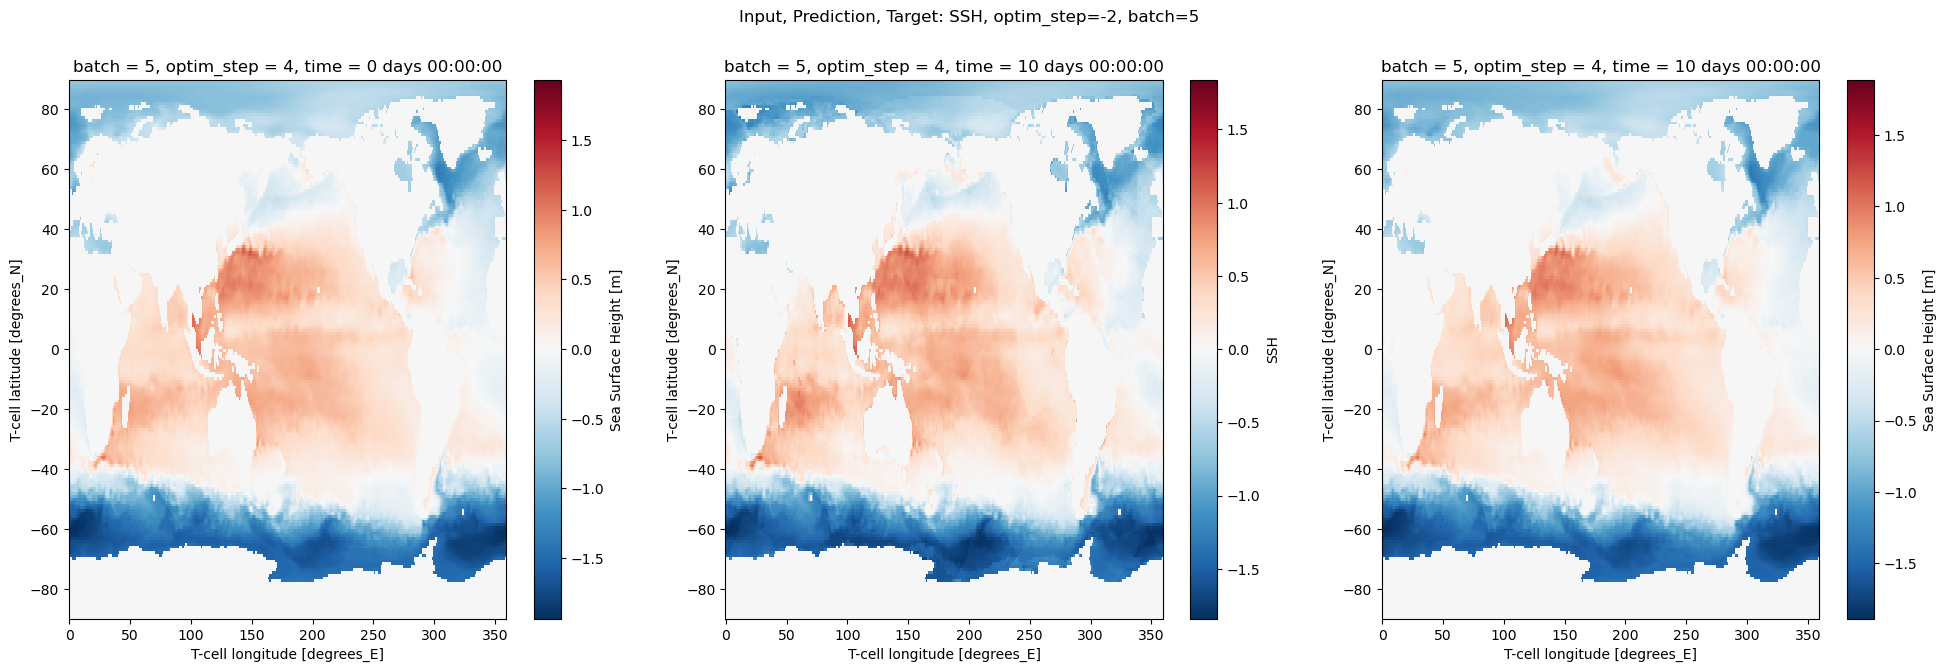

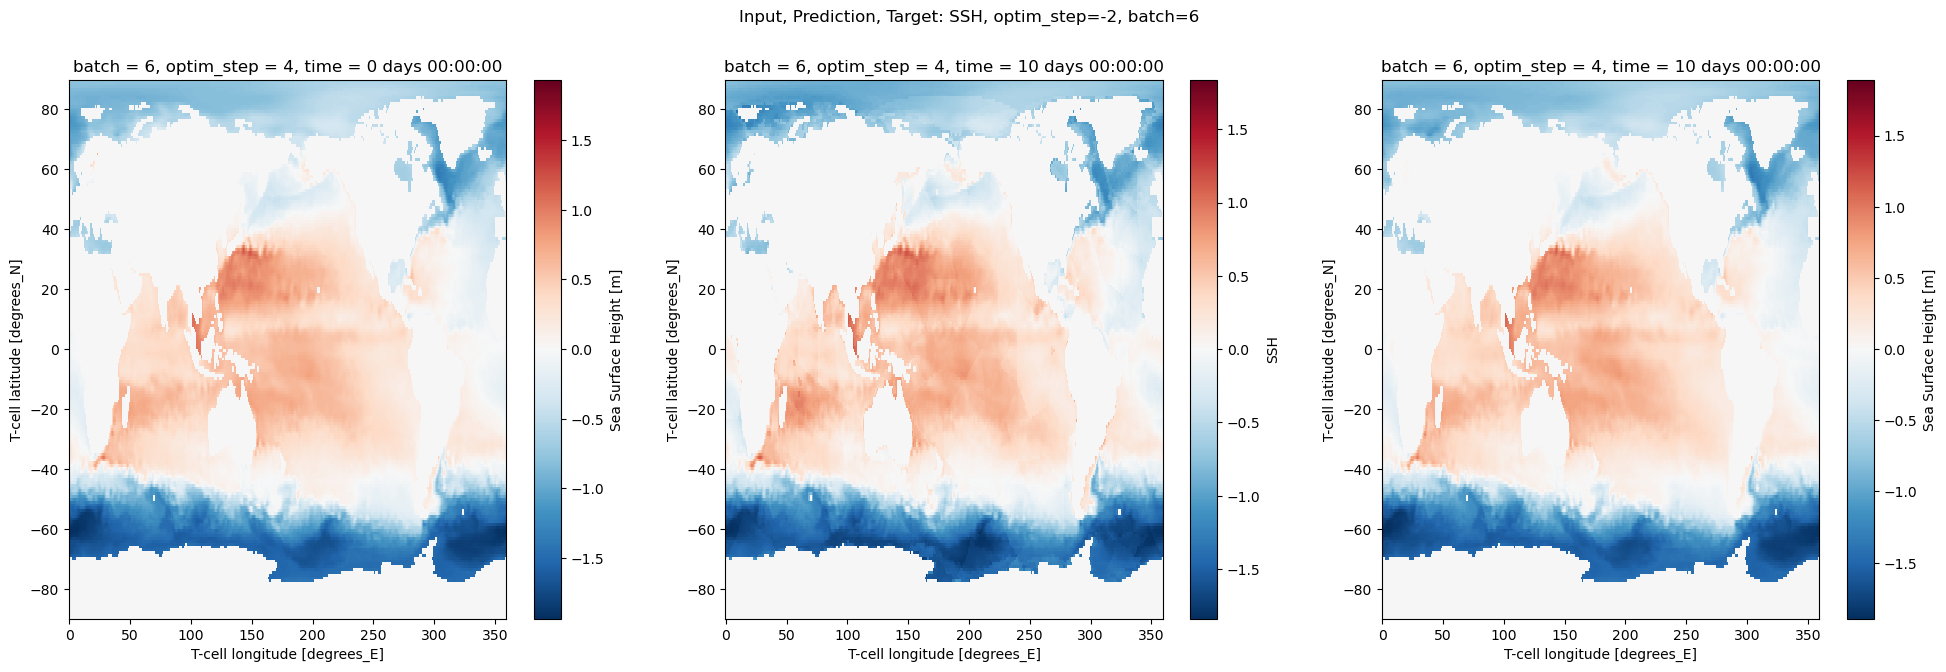

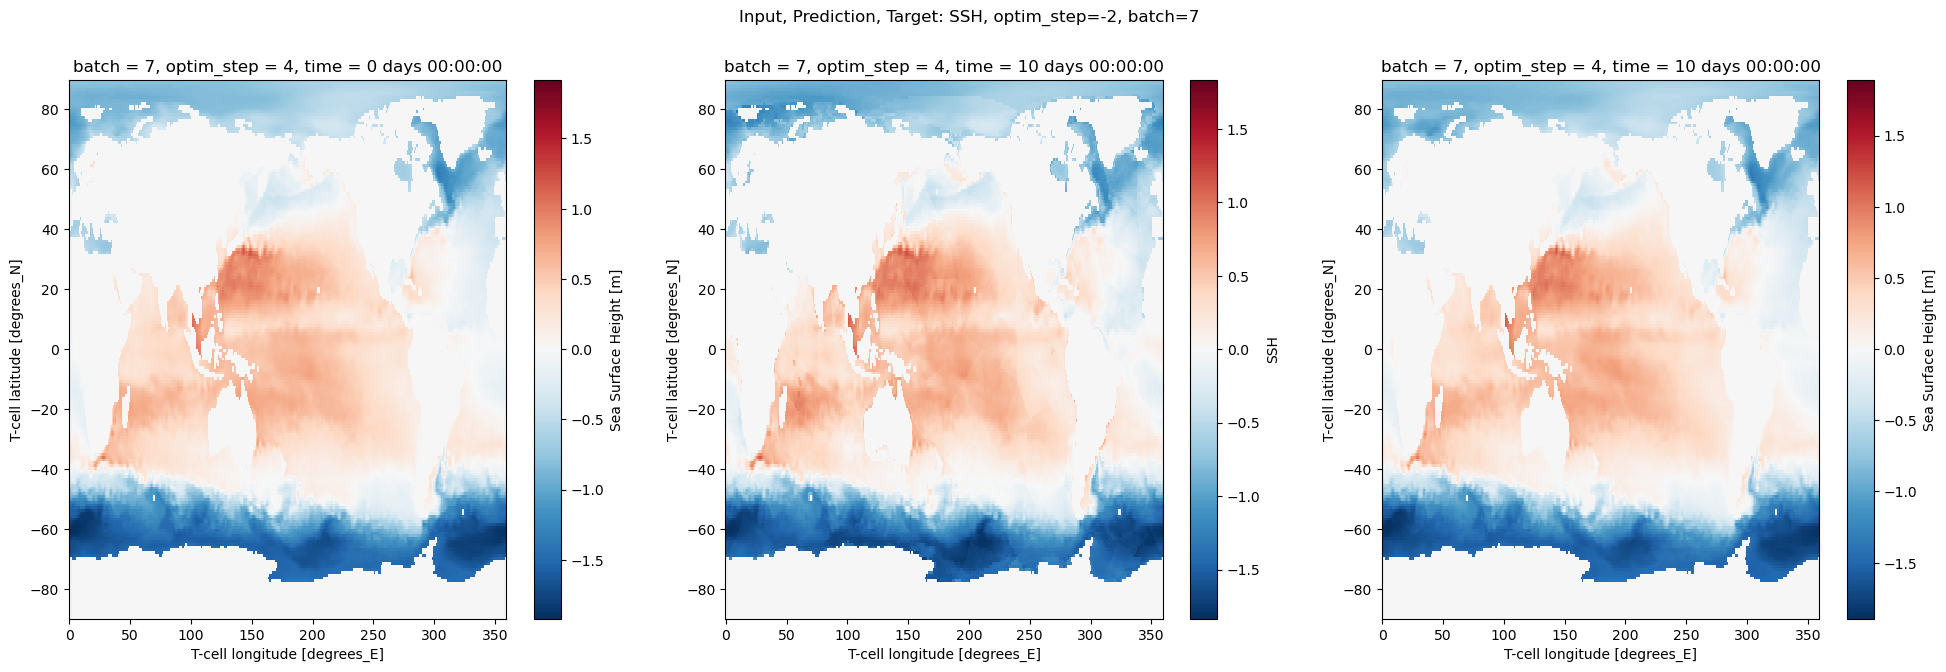

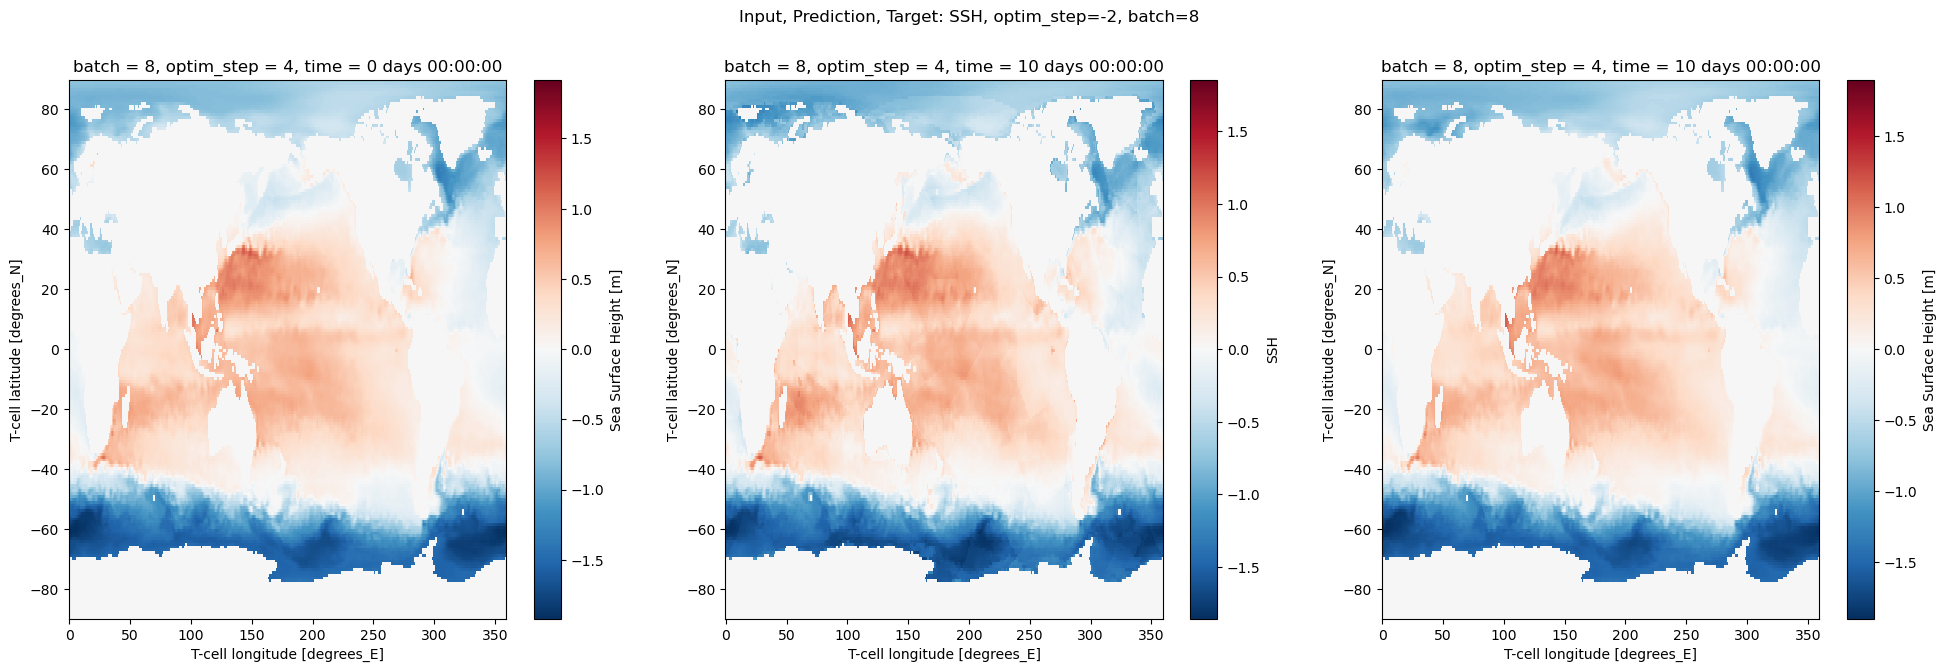

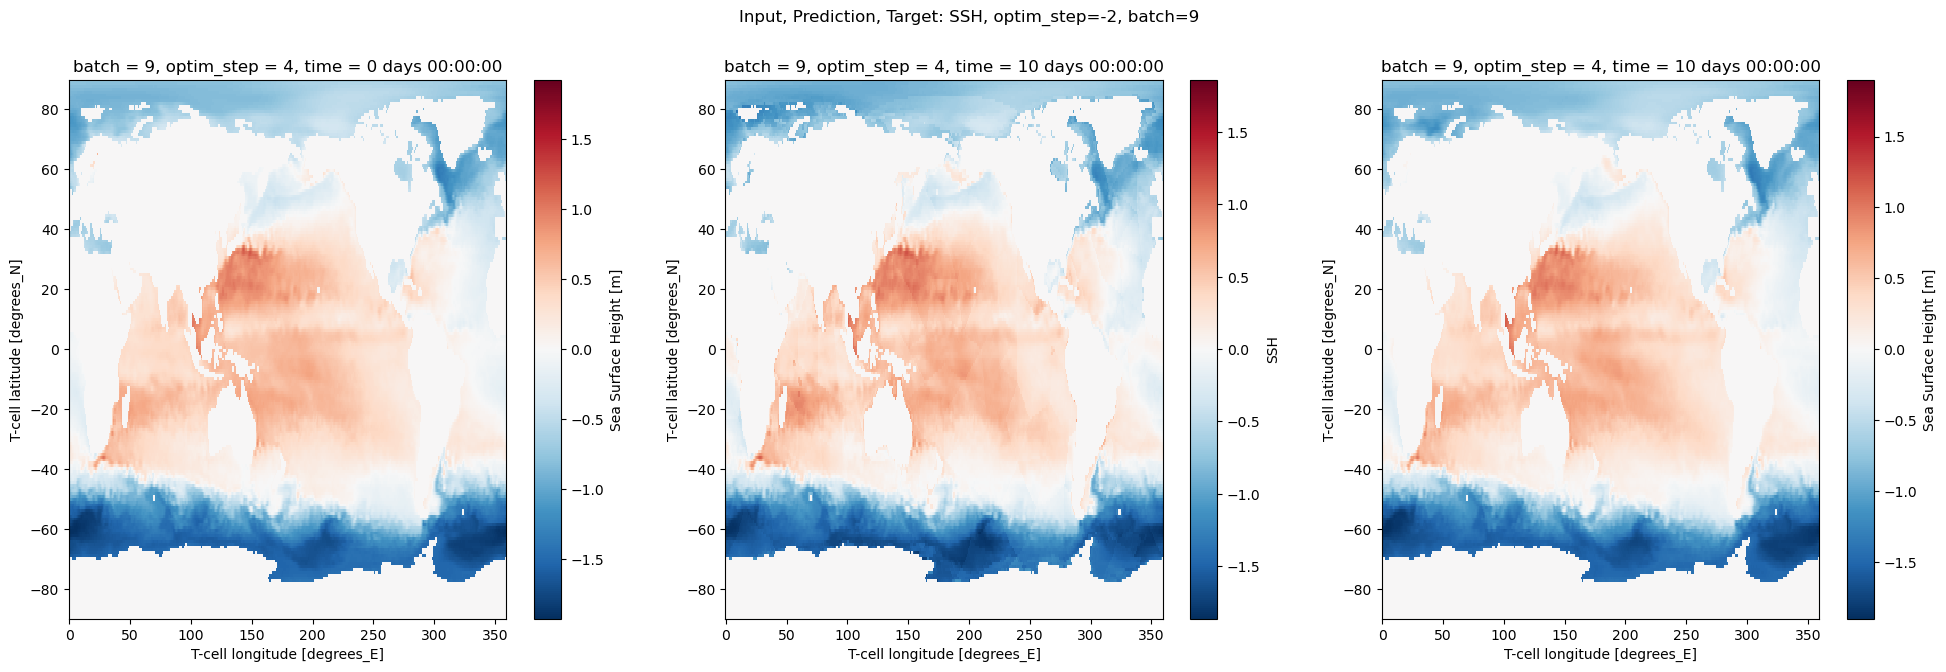

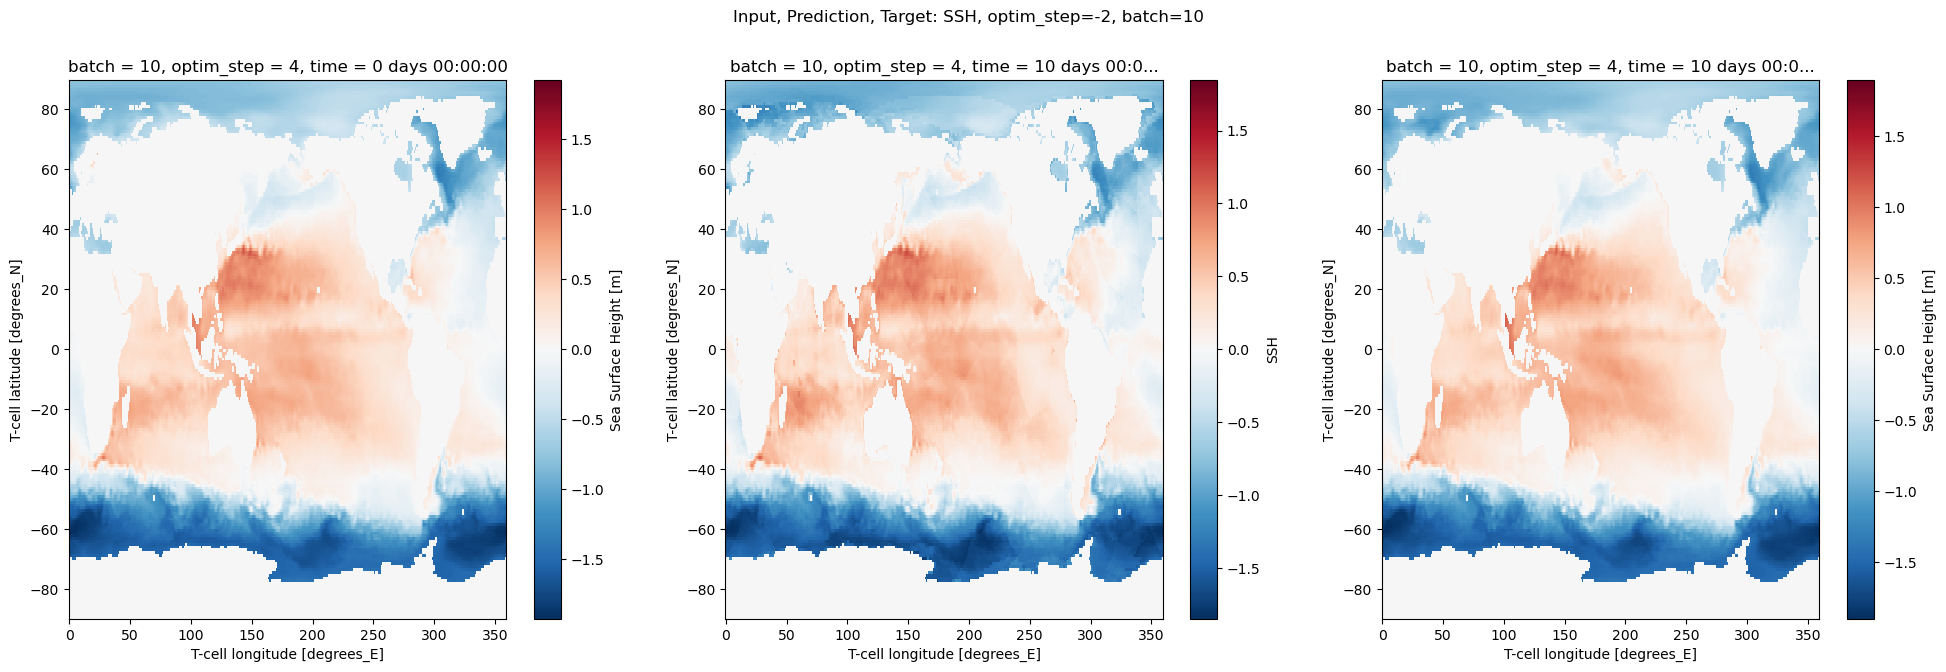

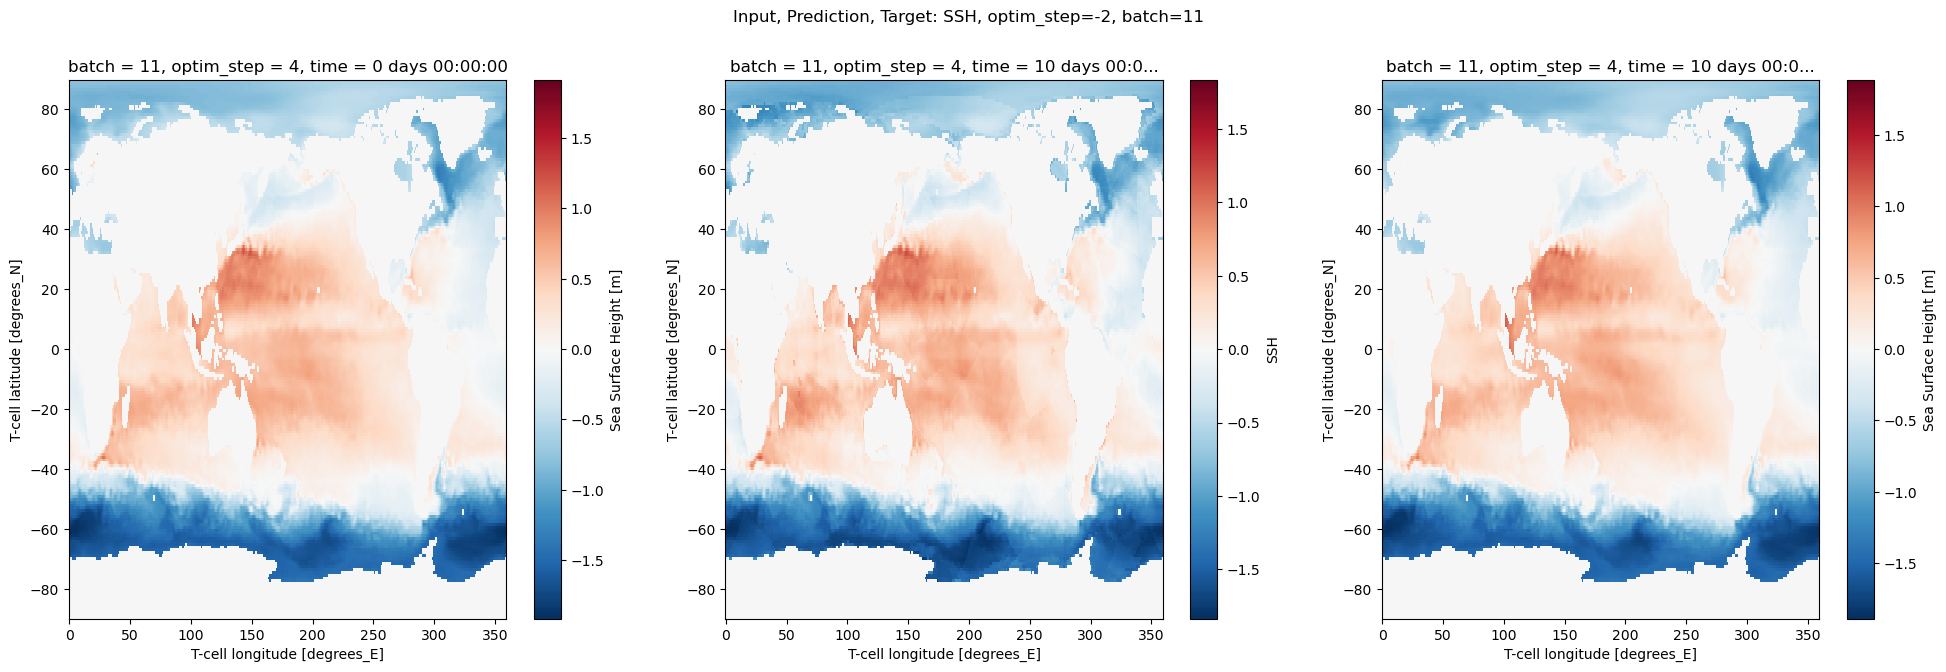

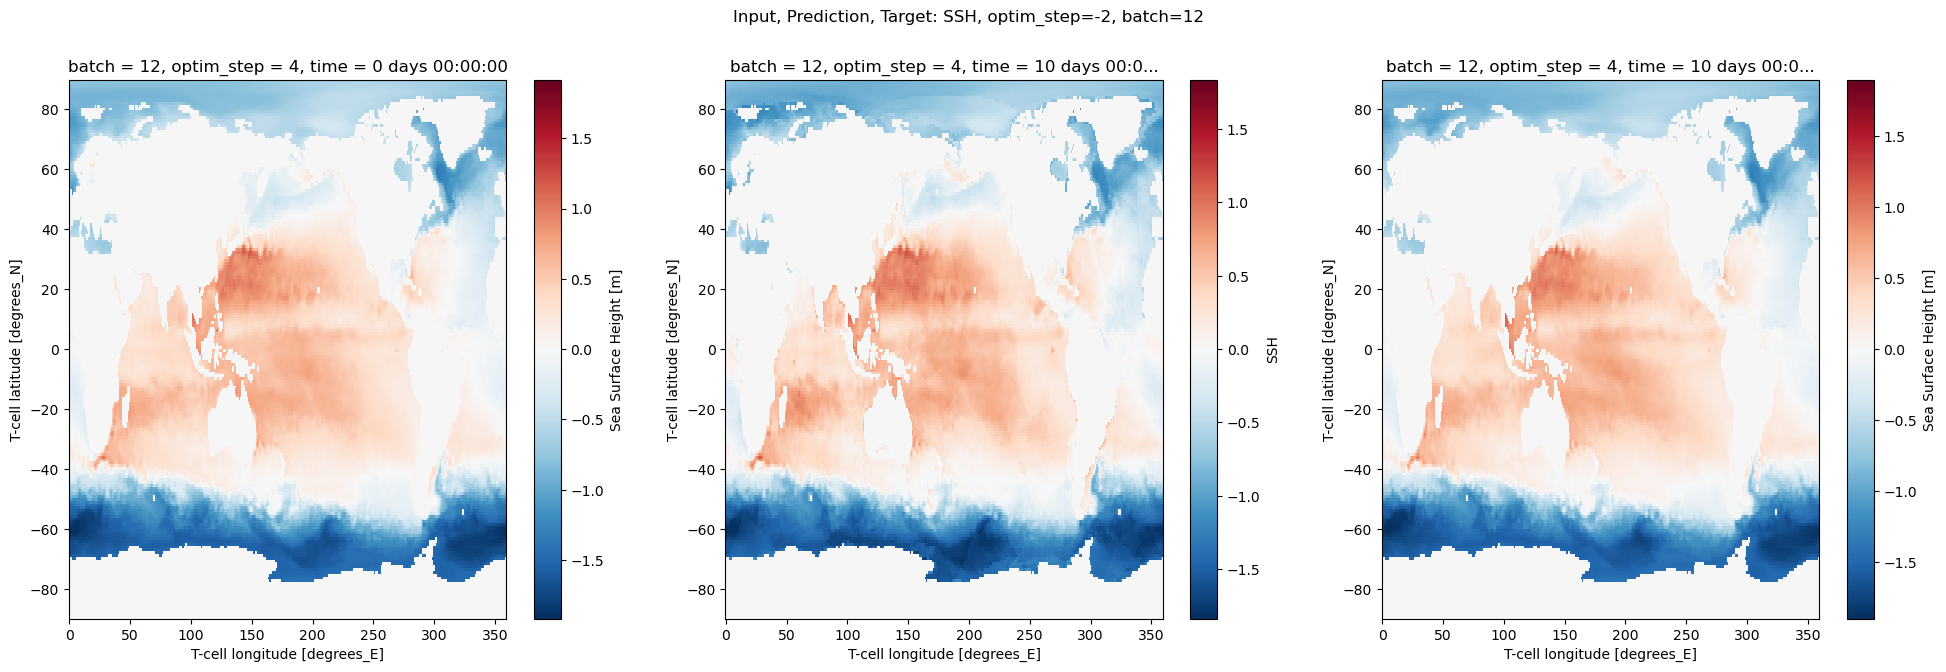

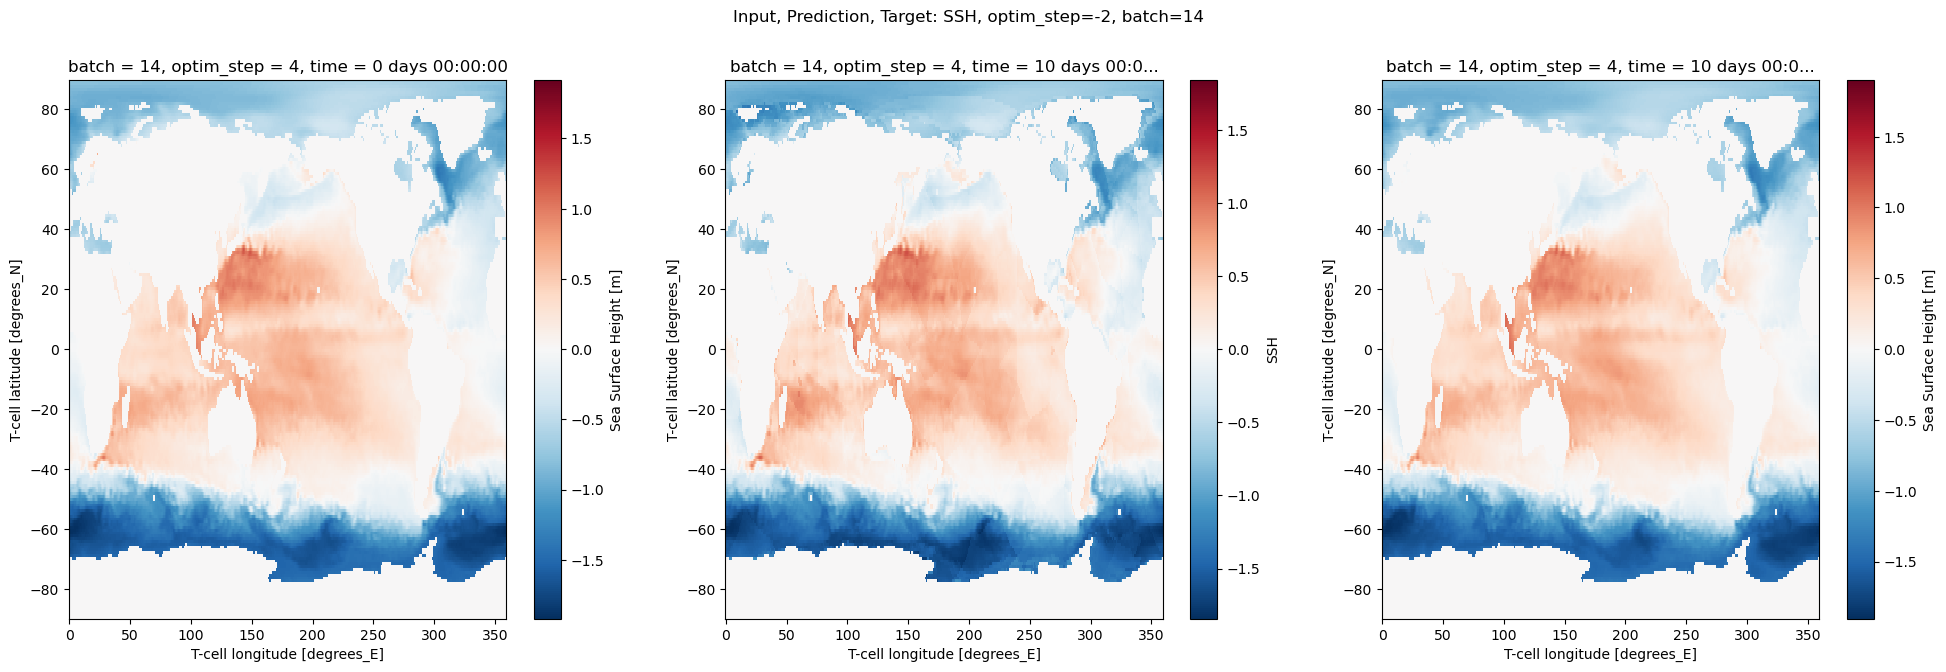

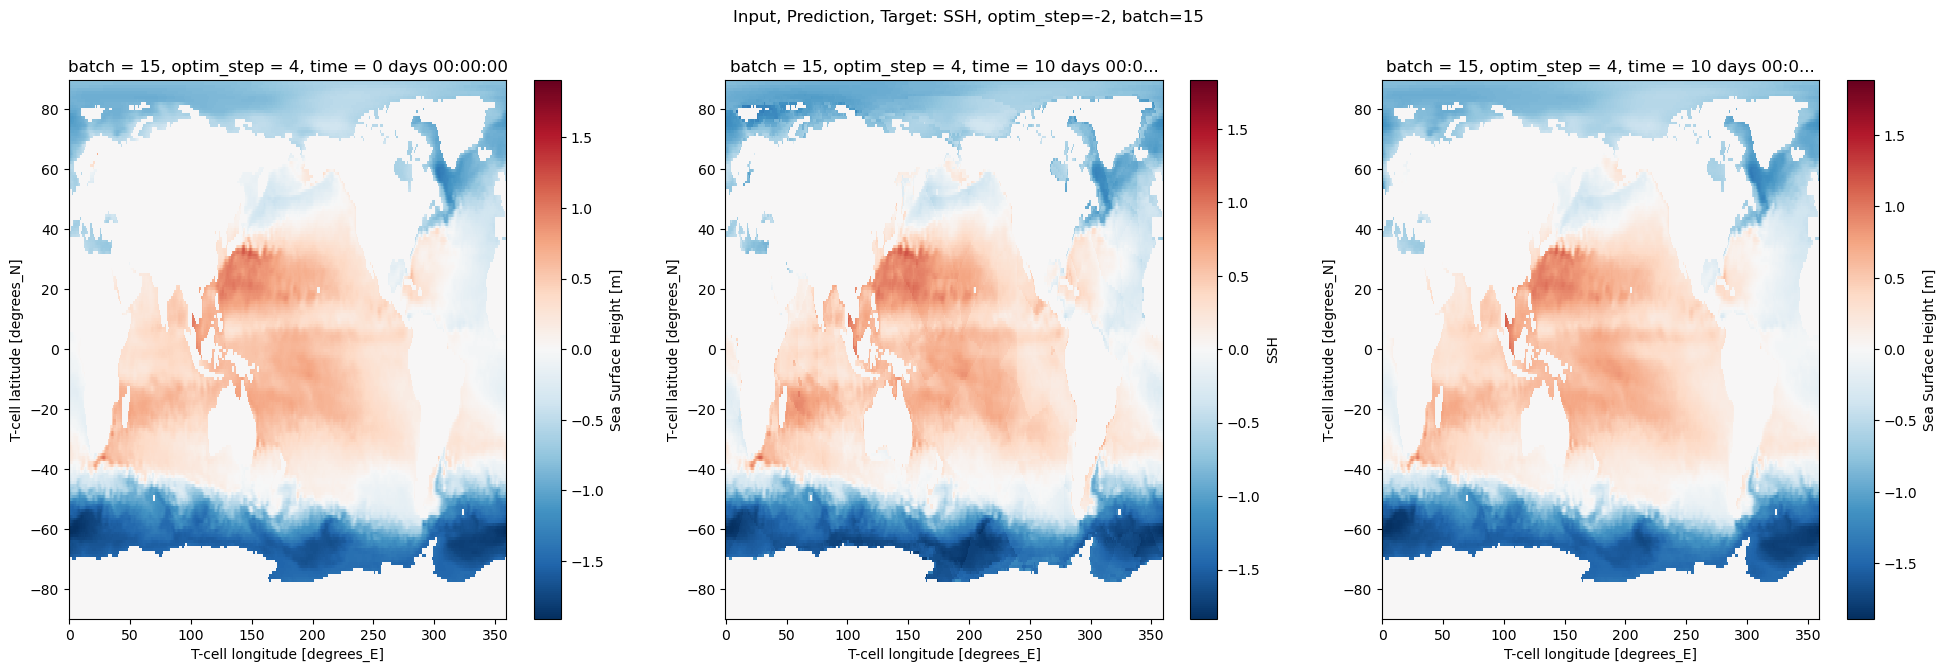

In [5]:
os = -2 # optimization step
for bnum in range(ds_pred.dims['batch']):
    fig, ax = plt.subplots(1, 3, figsize=(24,7))
    ds_inp.SSH.isel(time=-1, batch=bnum, optim_step=os).plot(ax=ax[0])
    ds_pred.SSH.isel(time=-1, batch=bnum, optim_step=os).plot(ax=ax[1])
    ds_tar.SSH.isel(time=-1, batch=bnum, optim_step=os).plot(ax=ax[2])
    plt.suptitle(f'Input, Prediction, Target: SSH, optim_step={os}, batch={bnum}')
    plt.show()

In [6]:
# Prediction vs Target RMSE
err = ds_pred.SSH.isel(time=-1, batch=0, optim_step=-1).values - ds_tar.SSH.isel(time=-1, batch=0, optim_step=-1).values
print("RMSE Error:", np.sqrt(np.mean(err**2)))

RMSE Error: 0.07287594


In [7]:
# IC vs Prediction Difference
diff_tm1 = ds_inp.SSH.isel(time=0, batch=0, optim_step=-1).values - ds_pred.SSH.isel(time=-1, batch=0, optim_step=-1).values
print("RMSE Diff with IC (t-1):", np.sqrt(np.mean(diff_tm1**2)))

RMSE Diff with IC (t-1): 0.06647992


In [8]:
diff_t = ds_inp.SSH.isel(time=1, batch=0, optim_step=-1).values - ds_pred.SSH.isel(time=-1, batch=0, optim_step=-1).values
print("RMSE Diff with IC (t):", np.sqrt(np.mean(diff_t**2)))

RMSE Diff with IC (t): 0.066342


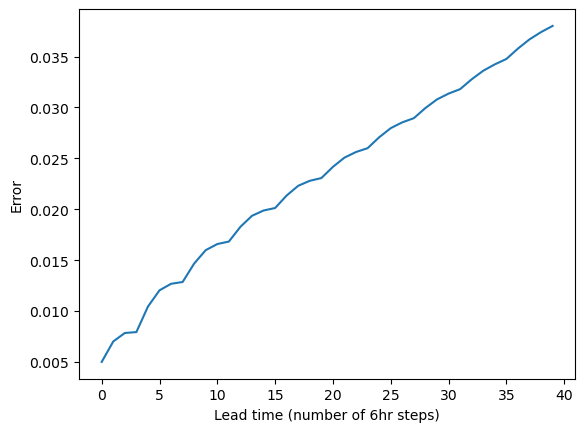

In [9]:
ssh_rmse = np.sqrt((ds_tar.SSH - ds_pred.SSH)**2)
plt.plot(ssh_rmse.mean(dim=('optim_step','batch', 'lat', 'lon')))
plt.ylabel('Error')
plt.xlabel('Lead time (number of 6hr steps)')
plt.show()

### Temp

In [10]:
depth = 0
fig, ax = plt.subplots(1,3, figsize=(24,7))
ds_inp.temp.isel(time=-1,  batch=8, optim_step=-2).sel(z_l=depth, method='nearest').plot(ax=ax[0])
ds_pred.temp.isel(time=-1,  batch=8, optim_step=-2).sel(z_l=depth, method='nearest').plot(ax=ax[1])
ds_tar.temp.isel(time=-1,  batch=8, optim_step=-2).sel(z_l=depth, method='nearest').plot(ax=ax[2])
plt.suptitle(f'Input, Prediction, Target: Temp, z_l={depth}')
plt.show()

### Ice Concentration 

In [11]:
fig, ax = plt.subplots(1,3, figsize=(24,7))
ds_inp.icec.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[0])
ds_pred.icec.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[1], cmap='viridis', vmin=0, vmax=1)
ds_tar.icec.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[2])
plt.suptitle(f'Input, Prediction, Target: Ice Concentration')
plt.show()

### Ice Thickness

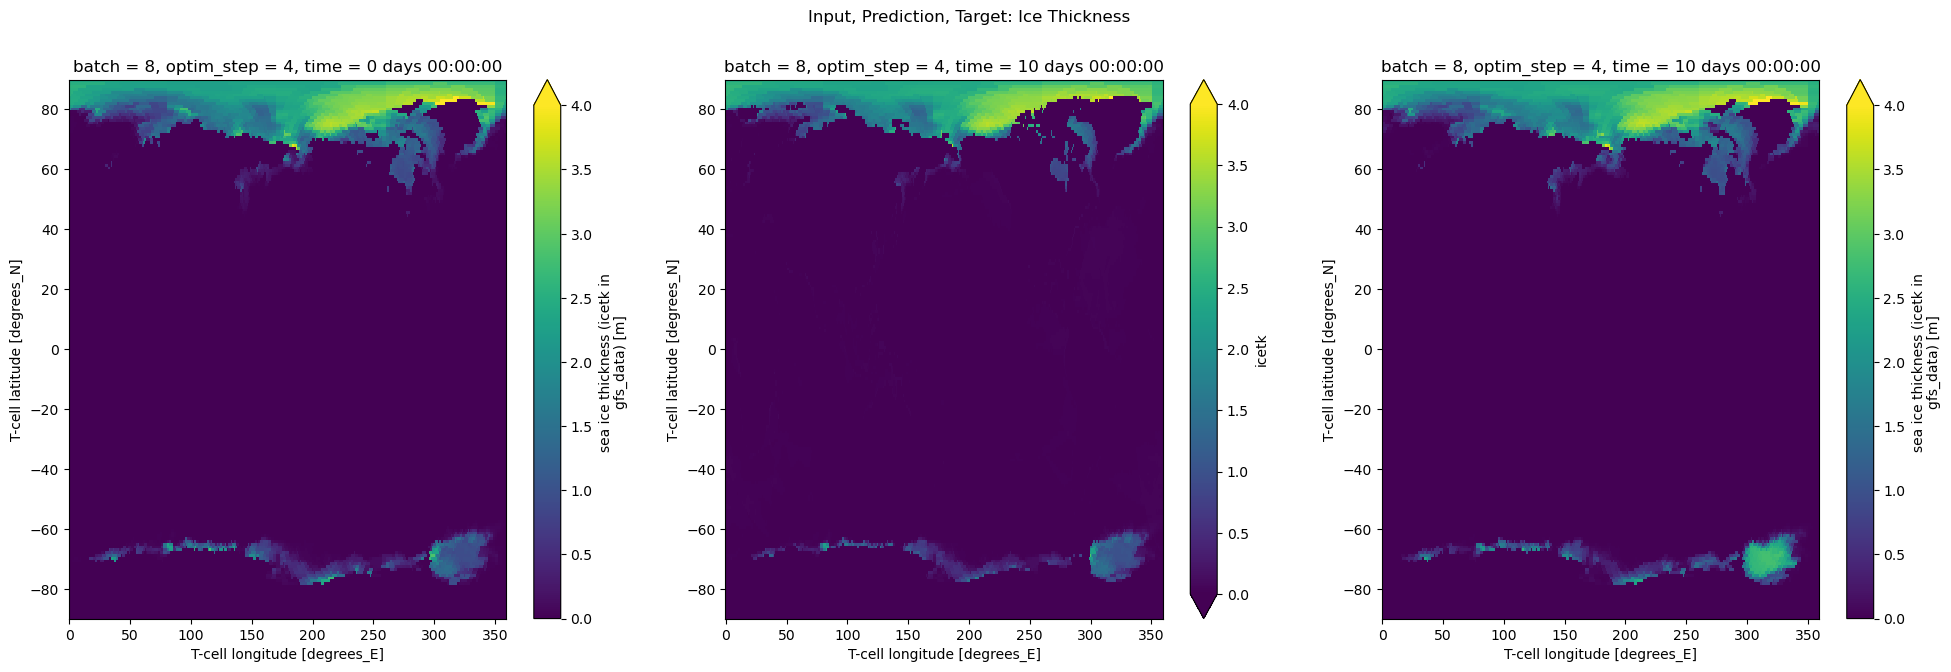

In [12]:
fig, ax = plt.subplots(1,3, figsize=(24,7))
ds_inp.icetk.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[0], vmin=0, vmax=4)
ds_pred.icetk.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[1], cmap='viridis', vmin=0, vmax=4)
ds_tar.icetk.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[2], vmin=0, vmax=4)
plt.suptitle(f'Input, Prediction, Target: Ice Thickness')
plt.show()

### Land Variable

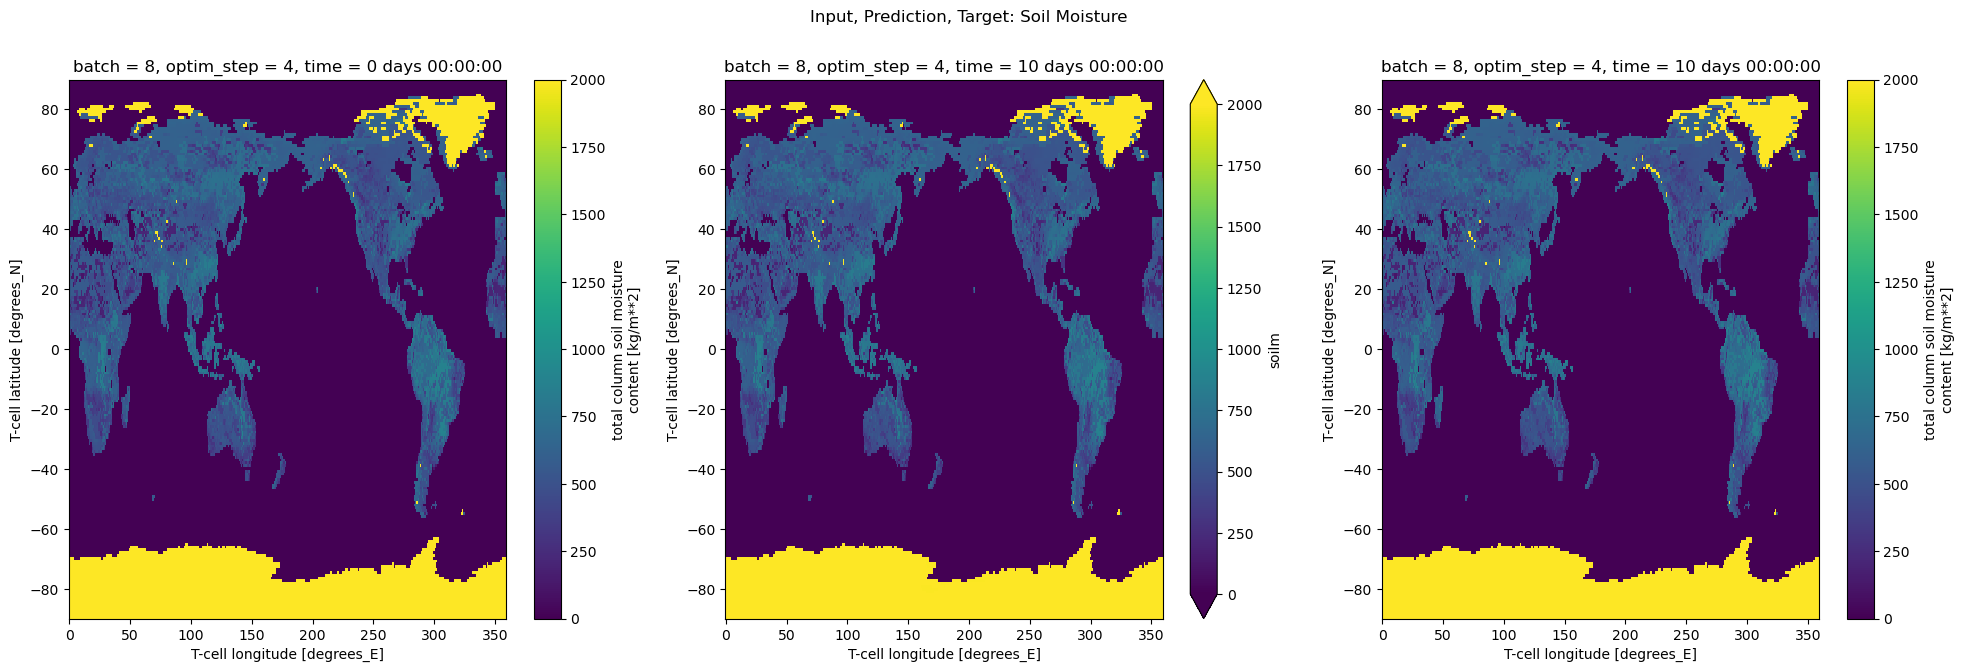

In [13]:
fig, ax = plt.subplots(1,3, figsize=(24,7))
ds_inp.soilm.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[0])
ds_pred.soilm.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[1], vmin=0, vmax=2000, cmap='viridis')
ds_tar.soilm.isel(time=-1,  batch=8, optim_step=-2).plot(ax=ax[2])
plt.suptitle(f'Input, Prediction, Target: Soil Moisture')
plt.show()

### Local plots

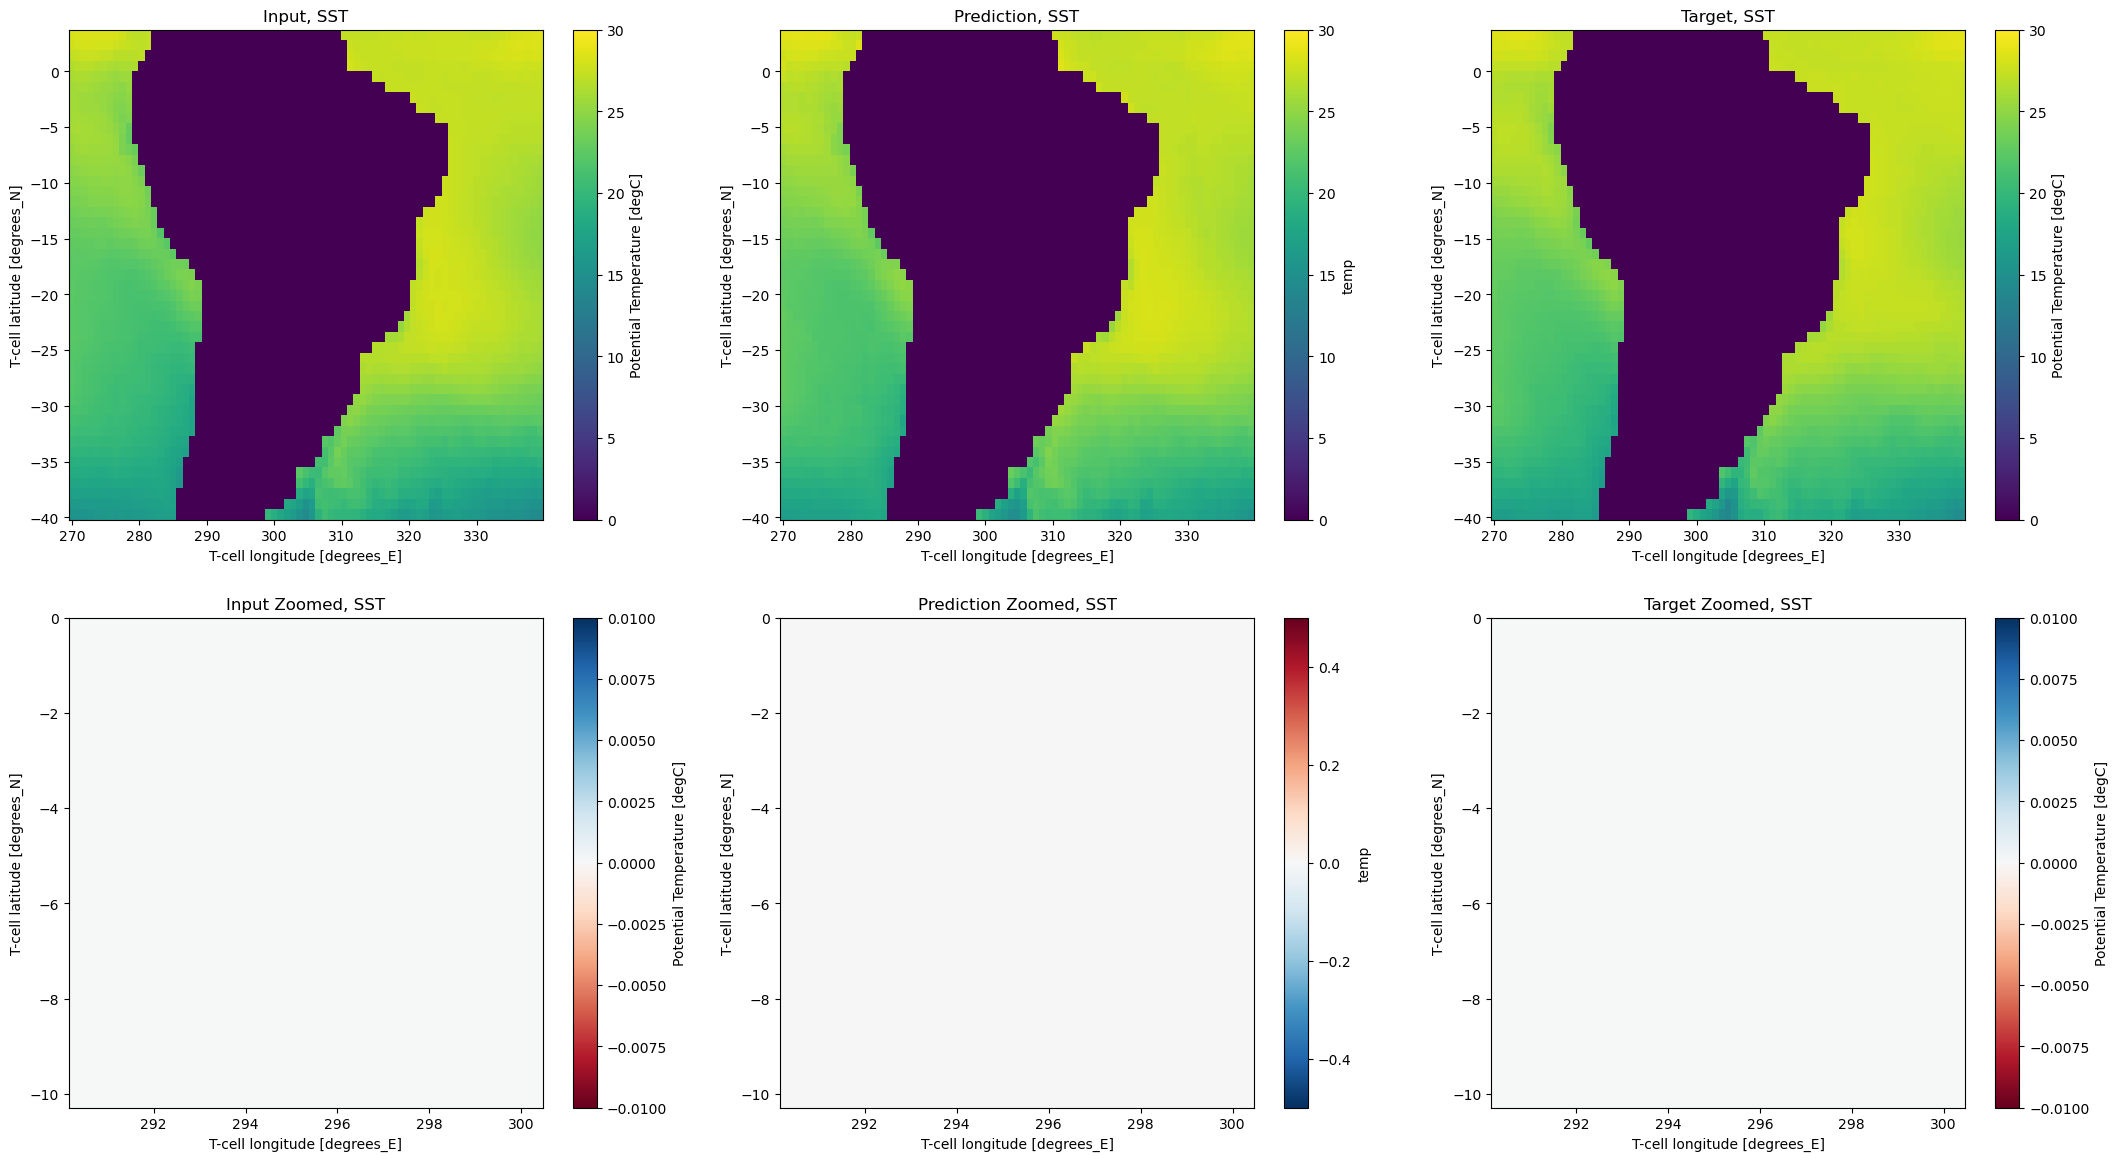

In [15]:
depth = 0 # Surface

fig, ax = plt.subplots(2, 3, figsize=(26,14))

# Input 
inp_temp = ds_inp.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
inp_temp_zoom = ds_inp.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
inp_temp.plot(ax=ax[0,0], vmin=0, vmax=30); ax[0,0].set_title("Input, SST")
inp_temp_zoom.plot(ax=ax[1,0], vmin=-0.01, vmax=0.01, cmap='RdBu'); ax[1,0].set_title("Input Zoomed, SST")

# Prediction
pred_temp = ds_pred.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
pred_temp_zoom = ds_pred.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
pred_temp.plot(ax=ax[0,1], vmin=0, vmax=30); ax[0,1].set_title("Prediction, SST")
pred_temp_zoom.plot(ax=ax[1,1], vmin=-0.5, vmax=0.5, cmap='RdBu_r'); ax[1,1].set_title("Prediction Zoomed, SST")

# Target
tar_temp = ds_tar.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
tar_temp_zoom = ds_tar.temp.isel(time=-1,  batch=8, optim_step=-2).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
tar_temp.plot(ax=ax[0,2], vmin=0, vmax=30); ax[0,2].set_title("Target, SST")
tar_temp_zoom.plot(ax=ax[1,2], vmin=-0.01, vmax=0.01, cmap='RdBu'); ax[1,2].set_title("Target Zoomed, SST")
#plt.savefig("Input_Prediction_Target_SST_Local.png", dpi=300)
plt.show()